<a href="https://colab.research.google.com/github/Musu1/Deep-Learning/blob/master/pyTorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Data Loading

In [2]:
import torchvision #This library is for using computer vision with pytorch
import torchvision.transforms as transforms
# Data set which we are using is CIFAR10 which has 32x32 size images dividede in 10 classes can be found on google. Also there is CIFAR100 which has 100 classes
#We can either download manually or use this comand to download this particular dataset
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
# Now the labels from the data would be indexes and not the names so we are manually putting them
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [0]:
# We are loading data from trainset (downloaded one) and in batch size of 4 that is everytime it will give me 4 different images
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle='True')

In [5]:
#Now I need to create an iterator to iterate over the trainloader
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(images.shape) #This would give us a batch of four images size
print(images[0].shape) # This shows length,width and height of a image
print(labels[0].item()) # This will return an index which can be inferred from classes

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
6


#Visualise data

In [6]:
img=images[0]
print(type(img))

<class 'torch.Tensor'>


In [7]:
# Now to plot we need to convert it to numpy
npimg=img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
# To plot we should have first x then y and then z so we need to transpose this numpy img
#In 3d transpose can be of 3 ways but we want x first then y and finally z
npimg=np.transpose(npimg,(1,2,0))
print(npimg.shape)

(32, 32, 3)


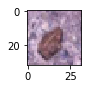

In [9]:
#Now we caan plot
plt.figure(figsize=(1,1))
plt.imshow(npimg)
plt.show()

In [0]:
#So now I can all these plotting in a fxn
def imshow(img):
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

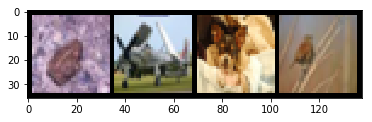

frog plane dog bird


In [11]:
# Now I can show in grid also

imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# Single covolutional layer

In [0]:
import torch.nn as nn

In [0]:
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3,padding=(1,1),stride=(2,2)) # So here we are only defining one convolutional layer that is just pass the img through this layer and get
                                                            # output. also first parameter is depth of kernel=depth of the input and second parameter is number of output
                                                            # channel = number of different kernel we are gonna apply to img and third parameter is size of the kernel
        # We can remove stride and padding also that is optional
  def forward(self,x):
    x=self.conv1(x)
    return x

In [0]:
net=FirstCNN()

In [0]:
out=net(images)

In [27]:
out.shape # second parameter depends on number of kernels applied and width,height of reulting image can be calculated ny assuming padding and stride as 0 here

torch.Size([4, 16, 16, 16])

In [28]:
for param in net.parameters():
  print(param.shape) # So since linear calculates all the parameter internally if we want to see them use this. So we have two parameters one kernels and one bias. So
  # Bias is equal to number of kernels that is one bias for each kernel and we can see width,height and depth of kernels and their numbers.

torch.Size([16, 3, 3, 3])
torch.Size([16])


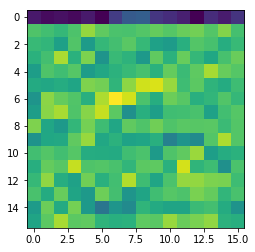

In [29]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()
# Plotting one of output layers

# Deep Convolutional layer

In [0]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2,self).__init__()
    self.model=nn.Sequential(nn.Conv2d(3,8,3),     #(N,3,32,32) -> (N,8,30,30)
                            nn.Conv2d(8,16,3))     #(n,8,30,30) -> (N,16,28,28)
  def forward(self,x):
    x=self.model(x)
    return x

In [38]:
net=FirstCNN_v2()
out=net(images)
out.shape

torch.Size([4, 16, 28, 28])

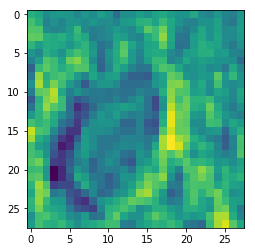

In [39]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

In [0]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3,self).__init__()
    self.model=nn.Sequential(nn.Conv2d(3,6,5),     #(N,3,32,32) -> (N,6,28,28)
                             nn.AvgPool2d(2,stride=2), # (N,6,28,28) -> (N,6,14,14)
                            nn.Conv2d(6,16,5),     #(N,6,14,14) -> (N,16,10,10)
                            nn.AvgPool2d(2,stride=2)) #(N,16,10,10) -> (n,16,5,5)
                         
  def forward(self,x):
    x=self.model(x)
    return x

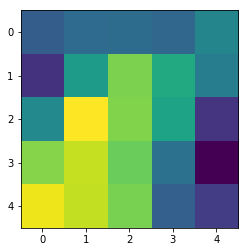

In [41]:
net=FirstCNN_v3()
out=net(images)
out.shape
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

# LeNet